# ANALISIS ESTADISTICO DE REDES SOCIALES
## TALLER 2 :  CONCEPTOS DE TEORIA DE GRAFOS, VISUALIZACION Y CARACTERIZACION

El siguiente documento tiene el fin la realización del segundo taller de ejercicios propuestos en la clase de Analisis Estadistico de Redes Sociales usando la libreria **Igraph**. El desarrollo a continuación

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import igraph as ig
from plotnine import *
pd.options.display.float_format = '{:,.4f}'.format

### <font color='red'>PUNTO 1</font>

Reproducir los ejemplos 3.1, 3.2, 5.2, 5.3, 6.1 de https://rpubs.com/jstats1702/1126816 en Python usando igraph y/o NetworkX .

-  **<font color='blue'>EJEMPLO 3.1</font>**

In [2]:
g = ig.Graph([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)])

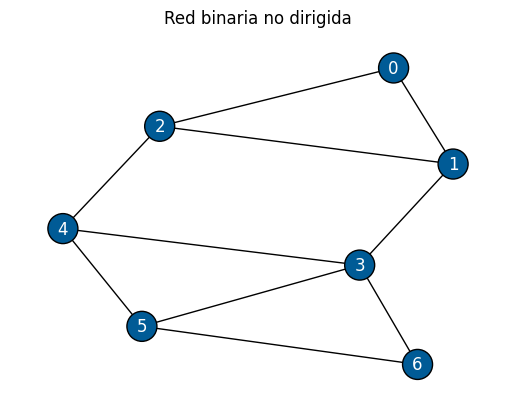

In [3]:
# Establecer la semilla
random.seed(123)

layout = g.layout("kamada_kawai") 
fig, ax = plt.subplots()

# Visualizar el grafo
ig.plot(g, target=ax, layout=layout, vertex_color="#005b96", vertex_size=30, vertex_label_size=12, 
        vertex_label_dist = 0, edge_color="black", edge_width=1, vertex_label=g.vs.indices, vertex_label_color = "white")
plt.title("Red binaria no dirigida")
plt.show()

In [4]:
# Obtener los vecinos del vértice 1
neighbors_of_0 = g.neighbors(0)

print("Vecinos del vértice 0:", neighbors_of_0)

Vecinos del vértice 0: [1, 2]


In [5]:
grados_de_g = g.degree()
print("Grados de los vertices de g: \n", grados_de_g)

Grados de los vertices de g: 
 [2, 3, 3, 4, 3, 3, 2]


-  **<font color='blue'>EJEMPLO 3.2</font>**

In [6]:
# Grafo dirigido
dg = ig.Graph([(0,1),(0,2),(1,2),(2,1)], directed=True)

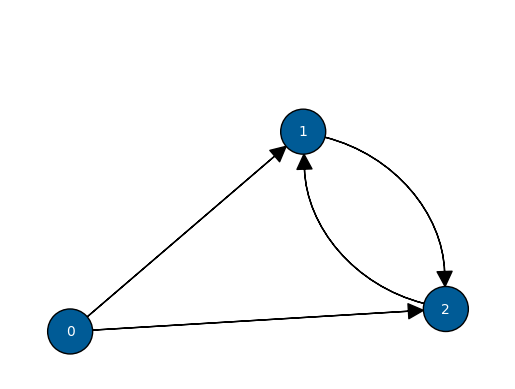

<Figure size 800x600 with 0 Axes>

In [7]:
# Graficar la red binaria dirigida
fig, ax = plt.subplots()
#layout = g.layout("kamada_kawai")

plt.figure(figsize=(8, 6))
ig.plot(dg, target=ax, vertex_color="#005b96", edge_width = 1 , vertex_size=45, vertex_label_size=10, 
        vertex_label_dist = 0, edge_color="black", vertex_label=dg.vs.indices, main="Red ponderada no dirigida", vertex_label_color = "white")


plt.show()

In [8]:
# Calcular el grado de entrada de los nodos en el grafo dirigido dg
degrees1 = dg.degree(mode = "in")

print("Grado de entrada de los nodos:", degrees1)

Grado de entrada de los nodos: [0, 2, 2]


In [9]:
degrees2 = dg.degree(mode = "out")

print("Grado de salida de los nodos:", degrees2)

Grado de salida de los nodos: [2, 1, 1]


-  **<font color='blue'>EJEMPLO 5.2</font>**

In [10]:
# Crear el grafo no dirigido g

g = ig.Graph([(0,6),(1,6),(1,3),(2,5),(3,6),(4,10),(5,11),(6,7),(6,8),(6,9)])

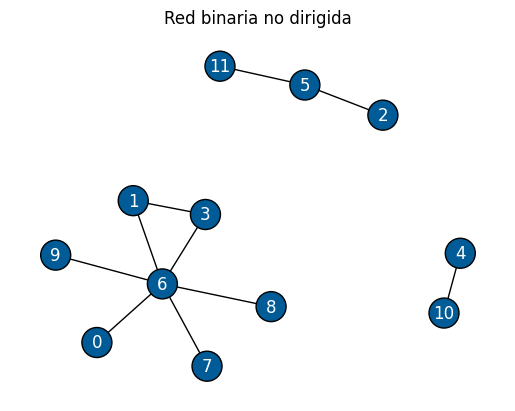

In [11]:
# Establecer la semilla
random.seed(123)

layout = g.layout("kamada_kawai") 
fig, ax = plt.subplots()

# Visualizar el grafo
ig.plot(g, target=ax, vertex_color="#005b96", vertex_size=30, vertex_label_size=12, 
        vertex_label_dist = 0, edge_color="black", edge_width=1, vertex_label=g.vs.indices,vertex_label_color = "white")
plt.title("Red binaria no dirigida")
plt.show()

In [12]:
print("La red esta conectada:", g.is_connected() )

La red esta conectada: False


In [13]:
# Obtener la información de los clusters
clusters = g.clusters()

def PC (clusters):
    pertenencia = {}
    for i, cluster in enumerate(clusters):
        for nodo in cluster:
            pertenencia[nodo] = i
    matriz_pertenencia = [[], []]
    for nodo, cluster_id in pertenencia.items():
        matriz_pertenencia[0].append(nodo)
        matriz_pertenencia[1].append(cluster_id)
    
    # Imprimir la matriz de pertenencia
    print(" ".join(map(str, matriz_pertenencia[0])))
    print(" ".join(map(str, matriz_pertenencia[1])))

# Imprimir la pertenencia a los clusters, los tamaños de los clusters y el número de clusters
print("Pertenencia a los clusters:")
PC(clusters)
print("Tamaños de los clusters:", len(clusters[0]),len(clusters[1]),len(clusters[2]))
print("Número de clusters:", len(clusters))

Pertenencia a los clusters:
0 1 3 6 7 8 9 2 5 11 4 10
0 0 0 0 0 0 0 1 1 1 2 2
Tamaños de los clusters: 7 3 2
Número de clusters: 3


C:\Users\Pc\AppData\Local\Temp\ipykernel_5304\2542600051.py:2: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead


-  **<font color='blue'>EJEMPLO 5.3</font>**

In [14]:
# Grafo dirigido
dg = ig.Graph([(0,1),(0,2),(1,2),(2,1)], directed=True)

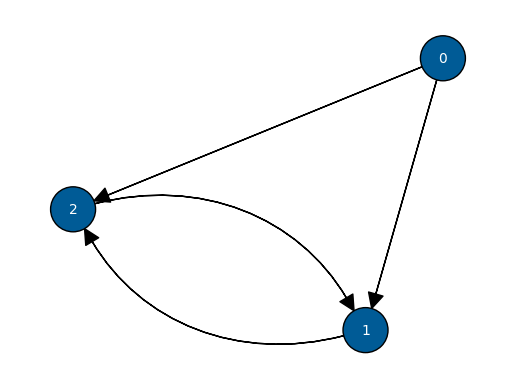

<Figure size 800x600 with 0 Axes>

In [15]:
# Graficar la red binaria dirigida
fig, ax = plt.subplots()
#layout = g.layout("kamada_kawai")

plt.figure(figsize=(8, 6))
ig.plot(dg, target=ax, vertex_color="#005b96", edge_width = 1 , vertex_size=45, vertex_label_size=10, 
        vertex_label_dist = 0, edge_color="black", vertex_label=dg.vs.indices, main="Red ponderada no dirigida", vertex_label_color = "white")


plt.show()

In [16]:
Connected1 = dg.is_connected(mode = "weak")
print("El grafo es conectado de forma debil: ", Connected1)

Connected2 = dg.is_connected(mode = "strong")
print("El grafo es conectado de forma fuerte: ", Connected2)

El grafo es conectado de forma debil:  True
El grafo es conectado de forma fuerte:  False


-  **<font color='blue'>EJEMPLO 6.1</font>**

In [17]:
g = ig.Graph([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)])

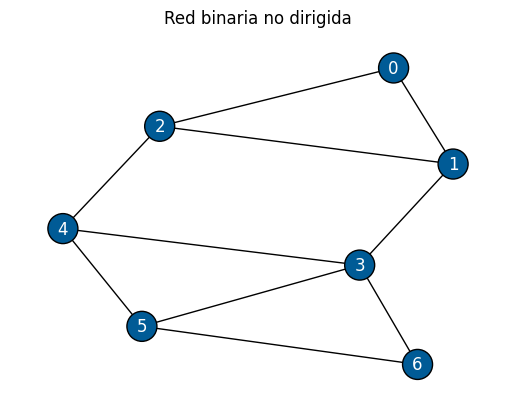

In [18]:
# Establecer la semilla
random.seed(123)

layout = g.layout_auto()
fig, ax = plt.subplots()

# Visualizar el grafo
ig.plot(g, target=ax, layout=layout, vertex_color="#005b96", vertex_size=30, vertex_label_size=12, 
        vertex_label_dist = 0, edge_color="black", edge_width=1, vertex_label=g.vs.indices, vertex_label_color = "white")
plt.title("Red binaria no dirigida")
plt.show()

In [19]:
print("Distancias de 0 a 6:", g.shortest_paths(0, 6)[0][0])

Distancias de 0 a 6: 3


C:\Users\Pc\AppData\Local\Temp\ipykernel_5304\3486963832.py:1: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead


In [20]:
print("Caminos más cortos de 0 a 6:", g.get_shortest_paths(0, to=6)[0])

Caminos más cortos de 0 a 6: [0, 1, 3, 6]


In [21]:
D = g.shortest_paths()
print("Matriz de distancias:")
for row in D:
    print(row)

Matriz de distancias:
[0, 1, 1, 2, 2, 3, 3]
[1, 0, 1, 1, 2, 2, 2]
[1, 1, 0, 2, 1, 2, 3]
[2, 1, 2, 0, 1, 1, 1]
[2, 2, 1, 1, 0, 1, 2]
[3, 2, 2, 1, 1, 0, 1]
[3, 2, 3, 1, 2, 1, 0]


C:\Users\Pc\AppData\Local\Temp\ipykernel_5304\482109952.py:1: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead


In [22]:
# Calcular el diámetro del grafo
diameter = g.diameter()
print("Diámetro del grafo:", g.diameter())

Diámetro del grafo: 3


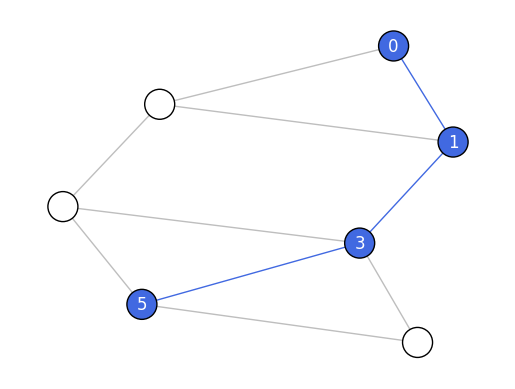

In [23]:
# Calcular el diámetro del grafo
diameter_nodes = g.get_diameter()
diameter_edges = [(diameter_nodes[i], diameter_nodes[i+1]) for i in range(len(diameter_nodes)-1)]

# Configurar los colores y anchos de las aristas y nodos
g.vs["color"] = "white"  # Establecer el color de los nodos a blanco
g.es["color"] = "grey"    # Establecer el color de las aristas a gris
g.es["width"] = 1         # Establecer el ancho de las aristas a 1

# Colorear nodos y aristas en el camino del diámetro
for node in diameter_nodes:
    g.vs[node]["color"] = "royalblue"
for edge in diameter_edges:
    g.es.select(_within=edge)["color"] = "royalblue"

fig, ax = plt.subplots()

# Visualizar el grafo
ig.plot(g,target= ax, bbox=(300, 300), vertex_label=g.vs.indices, vertex_label_color = "white")  # bbox define el tamaño de la figura

In [24]:
# Calcular la distancia geodésica promedio
mean_distance = g.average_path_length()

print("Distancia geodésica promedio:", mean_distance)

Distancia geodésica promedio: 1.6666666666666667


In [25]:
# Obtener las distancias entre todos los pares de nodos
distances = g.shortest_paths()

# Contar las ocurrencias de cada distancia
distance_distribution = [dist for sublist in distances for dist in sublist if dist < float('inf')]

# Imprimir la distribución de las distancias
print("Distribución de las distancias:")
for i in range(max(distance_distribution) + 1):
    count = distance_distribution.count(i)
    print(f"Distancia: {i}, Count: {count}")

Distribución de las distancias:
Distancia: 0, Count: 7
Distancia: 1, Count: 20
Distancia: 2, Count: 16
Distancia: 3, Count: 6


C:\Users\Pc\AppData\Local\Temp\ipykernel_5304\4239942166.py:2: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead


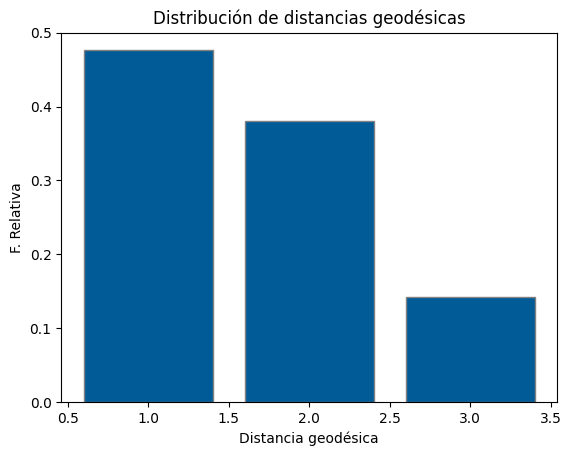

In [26]:
# Calcular la frecuencia relativa de cada distancia, excluyendo la distancia 0
dist_count = {}
for dist in distance_distribution:
    if dist != 0:
        dist_count[dist] = dist_count.get(dist, 0) + 1

total_paths = len(distance_distribution) - distance_distribution.count(0)
rel_freq = {key: val / total_paths for key, val in dist_count.items()}

# Graficar la distribución de distancias
plt.bar(rel_freq.keys(), rel_freq.values(), color='#005b96', edgecolor='grey')
plt.xlabel('Distancia geodésica')
plt.ylabel('F. Relativa')
plt.title('Distribución de distancias geodésicas')
plt.show()

###  <font color='red'>PUNTO 2</font>

El grado de un nodo en una red tanto dirigida como no dirigida se puede calcular fácilmente a partir de la matriz de adyacencia $\mathbf{Y}=\left[y_{i, j}\right]$. El out-degree $d_i^{\text {out }}$ y el in-degree $d_i^{\text {in }}$ del nodo $i$ se pueden calcular respectivamente como:

$$
d_i^{\text {out }}=\sum_{j: j \neq i} y_{i, j} \quad \text { y } \quad d_i^{\text {in }}=\sum_{j: j \neq i} y_{j, i} .
$$

**Muestre que si la red es no dirigida entonces $d_i^{\text {out }}=d_i^{\text {in }}$.**

#### **<font color='blue'>SOLUCION</font>**

Para demostrar que si la red es no dirigida, entonces el grado de salida de un nodo es igual al grado de entrada del mismo nodo, podemos utilizar la definición de la matriz de adyacencia para una red no dirigida.

En una red no dirigida, la matriz de adyacencia $\mathbf{Y}$ es simétrica, lo que significa que $y_{i,j} = y_{j,i}$ para todos los nodos $i$ y $j$. Esto se debe a que si hay una conexión entre el nodo $i$ y el nodo $j$, entonces también habrá una conexión entre el nodo $j$ y el nodo $i$ en una red no dirigida.

Dado esto, podemos reescribir las fórmulas para el grado de salida $d_i^{\text{out}}$ y el grado de entrada $d_i^{\text{in}}$ como:

$$
d_i^{\text{out}} = \sum_{j: j \neq i} y_{i,j} = \sum_{j: j \neq i} y_{j,i} = d_i^{\text{in}}
$$

En la segunda igualdad, intercambiamos los índices $i$ y $j$ debido a la simetría de la matriz de adyacencia en una red no dirigida. Por lo tanto, hemos demostrado que en una red no dirigida, el grado de salida de un n


In [27]:
## EJEMPLO EN PYTHON DE LO ANTERIOR 

In [28]:
import igraph as ig

# Crear un grafo no dirigido
g_undirected = ig.Graph([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)])

# Crear un grafo dirigido
g_directed = ig.Graph([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)], directed=True)

# Obtener la matriz de adyacencia para ambos grafos
adjacency_matrix_undirected = g_undirected.get_adjacency()
adjacency_matrix_directed = g_directed.get_adjacency()

# Calcular el grado de salida e grado de entrada para un nodo específico (por ejemplo, nodo 0) en el grafo no dirigido
node_id = 0
out_degree_undirected = sum(adjacency_matrix_undirected[node_id])
in_degree_undirected = sum(row[node_id] for row in adjacency_matrix_undirected)

# Calcular el grado de salida e grado de entrada para un nodo específico (por ejemplo, nodo 0) en el grafo dirigido
out_degree_directed = sum(adjacency_matrix_directed[node_id])
in_degree_directed = sum(row[node_id] for row in adjacency_matrix_directed)

# Imprimir los resultados
print("Grafo no dirigido:")
print(f"Grado de salida del nodo {node_id}: {out_degree_undirected}")
print(f"Grado de entrada del nodo {node_id}: {in_degree_undirected}")

print("\nGrafo dirigido:")
print(f"Grado de salida del nodo {node_id}: {out_degree_directed}")
print(f"Grado de entrada del nodo {node_id}: {in_degree_directed}")

Grafo no dirigido:
Grado de salida del nodo 0: 2
Grado de entrada del nodo 0: 2

Grafo dirigido:
Grado de salida del nodo 0: 2
Grado de entrada del nodo 0: 0


###  <font color='red'>PUNTO 3</font>

Tanto para redes dirigidas como no dirigidas, se define la media global de las interacciones como:

$$\bar{y}=\frac{1}{n(n-1)} \sum_{i, j: i \neq j} y_{i, j}.$$

donde $\mathbf{Y}=\left[y_{i, j}\right]$ es la matriz de adyacencia de la red correspondiente. Tal estadístico describe de manera rudimentaria la posibilidad de observar una relación entre dos nodos cualesquiera, dado que no tiene en cuenta la heterogeneidad nodal (algunos nodos son más propensos a enviar/recibir más relacines).
{Y}$.

-  **Muestre que para relaciones no dirigidas la media global $\bar{y}$ es igual a la media tanto de la parte triangular superior de $\mathbf{Y}$ como de la parte triangular inferior de $\mathbf{Y}$.**

# Título

El número total de enlaces para la parte triangular tanto superior como inferior es $\frac{n(n-1)}{2}$ así:

\begin{align*}
    \text{Media Superior} & = \left(\frac{n(n-1)}{2}\right)^{-1}\sum_{i<j}y_{i,j} \\
    \text{Media Inferior} & = \left(\frac{n(n-1)}{2}\right)^{-1}\sum_{j<i}y_{i,j}   
\end{align*}

Así,

\begin{align*}
    \bar{y} & = \frac{1}{2}\left(\left(\frac{n(n-1)}{2}\right)^{-1}\sum_{i<j}y_{i,j}+\left(\frac{n(n-1)}{2}\right)^{-1}\sum_{j<i}y_{i,j}\right) \\
    \bar{y} & = \frac{1}{2}\left(\left(\frac{n(n-1)}{2}\right)^{-1}\sum_{i<j}y_{i,j}+\left(\frac{n(n-1)}{2}\right)^{-1}\sum_{i<j}y_{i,j}\right) \quad \text{debido a que $Y=Y^T$} \\
    \bar{y} & = \text{Media Superior}
\end{align*}

De la misma forma se puede demostrar que $\bar{y} = \text{Media Inferior}$.


#### **<font color='blue'>SOLUCION</font>**

- **Muestre que tanto para relaciones dirigidas como no dirigidas la media global corresponde a la densidad de la red.**

#### **<font color='blue'>SOLUCION</font>**

La densidad de un grafo se puede calcular como el grado promedio dividido por $n-1$.

El grado promedio de una red no dirigida es:

\begin{align*}
    \bar{d} & = \frac{1}{n}\sum_{i<j}y_{i,j} \quad \text{utilizando la parte triangular superior} \\ 
    \bar{d} & = \frac{1}{n}\sum_{j<i}y_{i,j} \quad \text{utilizando la parte triangular inferior} 
\end{align*}

De manera similar, se puede calcular el grado promedio de entrada ($\bar{d}_{in}$) y el grado promedio de salida ($\bar{d}_{out}$) en una red dirigida:

\begin{align*}
    \bar{d}_{in} & = \frac{1}{n}\sum_{i<j}y_{i,j} \\ 
    \bar{d}_{out} & = \frac{1}{n}\sum_{j<i}y_{i,j}
\end{align*}

Al dividir tanto $\bar{d}$ como $\bar{d}_{out}$ y $\bar{d}_{in}$ por $n-1$, encontramos la densidad de la red, que coincide con la misma fórmula de la media global, es decir:

$$ \text{Densidad} = \frac{1}{n-1} \bar{d}_{in} = \frac{1}{n-1} \bar{d}_{out} = \frac{1}{n-1} \bar{d} = \bar{y} $$

- **Muestre que tanto para relaciones dirigidas como no dirigidas se tiene que $\bar{d}^{\text {out }}=\bar{d}^{\mathrm{n}}=(n-1) \bar{y}$. Es decir, el grado promedio tanto de entrada como de salida son iguales, y además, equivalentes a la densidad.**

#### **<font color='blue'>SOLUCION</font>**
Al despejar la igualdad del punto anterior, se obtiene que $\bar{d}^{\text {out }} = \bar{d}^{\text{n}} = (n-1) \bar{y}$.
 dirigida.



### <font color='red'>PUNTO 4</font>

Considere un grafo estrella de orden $n$ y un grafo círculo de orden $n$. A continuación se representan ambos grafos para $n=9$. Estos grafos tienen aproximadamente la misma densidad, pero su estructura es muy diferente. Recuerde que la densidad de un grafo se puede calcular como el grado promedio dividido por $n-1$.

**Para la solucion**

Para demostrar que para el grafo círculo de orden $ n $ el grado promedio es $ \bar{d} = 2 $, y para el grafo estrella de orden $ n $ el grado promedio tiende a $ 2 $ cuando $ n $ tiende a infinito, primero necesitamos entender la estructura de estos grafos.

Un grafo círculo de orden $ n $ consiste en $ n $ nodos dispuestos en un círculo, donde cada nodo está conectado a sus dos nodos vecinos más cercanos. Por lo tanto, cada nodo tiene grado $ 2 $, ya que está conectado a sus dos vecinos.

Un grafo estrella de orden $ n $ tiene un nodo central conectado a todos los otros $ n-1 $ nodos, pero estos nodos no están conectados entre sí. Por lo tanto, el nodo central tiene grado $ n-1 $, mientras que los nodos periféricos tienen grado $ 1 $.

Ahora, calculemos el grado promedio para cada uno de estos grafos:

- **Muestre que para el grafo círculo de orden $n$ el grado promedio es $\bar{d}=2$.**

#### **<font color='blue'>SOLUCION</font>**

 Para el grafo círculo de orden $ n $, cada nodo tiene grado $ 2 $ ya que está conectado a sus dos vecinos más cercanos. Por lo tanto, el grado promedio $ \bar{d} $ es simplemente $ 2 $.

- **Muestre que para el grafo estrella de orden $n$ el grado promedio es $\bar{d}=2 \frac{n-1}{n} \rightarrow 2$ cuando $n \rightarrow \infty$.**

#### **<font color='blue'>SOLUCION</font>**


El nodo central tiene grado $n-1$ y hay $n-1$ nodos periféricos, cada uno con grado $1$. Entonces, la suma de los grados de todos los nodos es $(n-1) + (n-1) \cdot 1$. 

Por lo tanto, el grado promedio $\bar{d}$ se calcula como:

$$
\bar{d} = \frac{(n-1) + (n-1) \cdot 1}{n}
$$

$$
\bar{d} = \frac{n - 1 + n - 1}{n}
$$

$$
\bar{d} = \frac{2n - 2}{n}
$$

$$
\bar{d} = 2 - \frac{2}{n}
$$

Cuando $n$ tiende a infinito, $\frac{2}{n}$ tiende a $0$, por lo que $\bar{d}$ tiende a $2$.

Entonces, hemos verificado que para el grafo estrella de orden $n$, el grado promedio tiende a $2$ cuand $n$ tiende a infinito.


### <font color='red'>PUNTO 5</font>

**¿Cuáles de las siguientes secuencias son caminatas en el grafo que se presenta a continuación? ¿Cuáles senderos? ¿Cuáles circuitos? ¿Cuáles ciclos?**

#### **<font color='blue'>SOLUCION</font>**

Se creo una rutina en Python que identifica segun la secuencia entre sendero, circuitos y ciclos.

In [29]:
import igraph as ig

def determinar_tipo_secuencia(grafo, secuencia):
    """
    Determina si una secuencia es una caminata, un sendero, un circuito o un ciclo en el grafo dado.

    Parámetros:
        grafo (igraph.Graph): El grafo.
        secuencia (list): La secuencia de vértices.

    Devuelve:
        str: El tipo de secuencia ("Caminata", "Sendero", "Circuito", "Ciclo").
    """
    tipo = "Caminata"
    
    # Verificar si es un sendero
    if len(set(secuencia)) == len(secuencia):
        tipo = "Sendero"
        # Verificar si es un circuito
        if len(secuencia) > 1 and secuencia[0] == secuencia[-1]:
            tipo = "Circuito"
            # Verificar si es un ciclo
            if len(set(secuencia[:-1])) == len(secuencia[:-1]):
                tipo = "Ciclo"
    return tipo

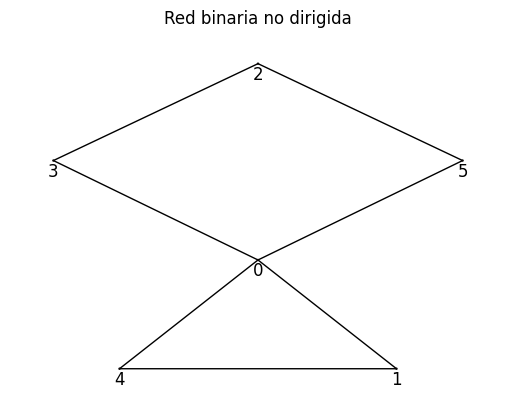

In [30]:
# Definir el grafo
g = ig.Graph([(0, 1), (1, 4), (4, 0), (0, 3), (3, 2), (2, 5), (5, 0)])

# Establecer la semilla
random.seed(123)

layout = g.layout("kamada_kawai") 
fig, ax = plt.subplots()

# Visualizar el grafo
ig.plot(g, target=ax, layout=layout, vertex_size= 1, vertex_label_size=12, 
        vertex_label_dist = 15, edge_color="black", edge_width=1, vertex_label=g.vs.indices)
plt.title("Red binaria no dirigida")
plt.show()

In [31]:
# Secuencias de prueba
secuencias = [
    [1, 0, 5, 2, 3],
    [1, 0, 5, 2, 3, 0, 4],
    [1, 0, 1, 4, 0, 3],
    [1, 0, 5, 2, 3]
]

# Determinar el tipo de secuencia para cada secuencia
for i, secuencia in enumerate(secuencias):
    print("Tipo de secuencia para secuencia_{}: {}".format(i+1, determinar_tipo_secuencia(g, secuencia)))

Tipo de secuencia para secuencia_1: Sendero
Tipo de secuencia para secuencia_2: Caminata
Tipo de secuencia para secuencia_3: Caminata
Tipo de secuencia para secuencia_4: Sendero


### <font color='red'>PUNTO 6</font>

El conjunto de datos `comtrade.RData` contiene un arreglo de cuatro dimensiones denominado `comtrade`. Los nombres de las dimensiones son: países, años (1996-2005) y clases de productos diferentes. Puedes cargar los datos con el siguiente código en R:

```R
datos <- load("comtrade.RData")
dimnames(comtrade)[c(1, 3, 4)]


- **Calcule el aumento medio global $\bar{Y}$ a lo largo de los 10 años en bienes manufacturados. Para ello considere la matriz de adyacencia $Y$ dada por:**

```R
Y <- apply(X = comtrade[, , c(5, 6)], MARGIN = c(1, 2), FUN = mean)


_Se ejecutaron ambos comandos en `R` y se exporto la matriz Y como archivo csv con la libreria `pandas`._

In [32]:
Y = pd.read_csv("Y.csv", index_col=0) 
Y.info()
Y.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Australia to USA
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Australia             29 non-null     float64
 1   Austria               29 non-null     float64
 2   Brazil                29 non-null     float64
 3   Canada                29 non-null     float64
 4   China                 29 non-null     float64
 5   China, Hong Kong SAR  29 non-null     float64
 6   Czech Rep.            29 non-null     float64
 7   Denmark               29 non-null     float64
 8   Finland               29 non-null     float64
 9   France                29 non-null     float64
 10  Germany               29 non-null     float64
 11  Greece                29 non-null     float64
 12  Indonesia             29 non-null     float64
 13  Ireland               29 non-null     float64
 14  Italy                 29 non-null     float64
 15  Japan                

,Australia,Austria,Brazil,Canada,China,"China, Hong Kong SAR",Czech Rep.,Denmark,Finland,France,...,Norway,Rep. of Korea,Singapore,Spain,Sweden,Switzerland,Thailand,Turkey,United Kingdom,USA
Australia,NaN,0.1029,0.0847,0.0349,0.0796,-0.0164,0.1834,0.0851,0.0318,0.0180,...,0.0294,0.0194,-0.0759,0.1138,0.0968,0.0105,-0.0138,0.1352,0.0814,0.0845
Austria,0.0838,NaN,0.0603,0.0572,0.0897,0.0579,0.0487,0.0312,0.0296,0.0348,...,-0.0042,0.0072,0.0189,0.0850,0.0331,0.0013,0.0206,0.1162,0.0623,0.0495
Brazil,-0.0576,0.0263,NaN,0.0697,0.1445,0.0135,0.0648,-0.0371,-0.0796,0.0391,...,0.0096,-0.0428,-0.1227,0.1632,-0.0228,0.0221,0.0152,0.1262,0.0264,0.0456
Canada,0.0029,0.0534,-0.0269,NaN,0.0976,0.0039,0.0412,0.0259,-0.0074,-0.0015,...,0.0411,-0.0156,-0.0351,0.0719,-0.0432,0.0191,0.0014,0.0828,0.0574,0.0447
China,0.1325,0.1185,0.1412,0.1617,NaN,0.0249,0.2485,0.1395,0.1566,0.1309,...,0.1289,0.1244,0.0789,0.1684,0.1743,0.0910,0.1411,0.2090,0.2038,0.1391


- **Calcule la media de todas las observaciones de cada fila de *Y*, es decir, calcule la media fila $ \overline{y}_{i \cdot} = \frac{1}{n-1} \sum_{j: j \neq i} y_{i,j} $ para cada país. Realice un histograma de los promedios fila $ \overline{y}_{i \cdot} $. Los promedios fila caracterizan diferentes niveles de actividad de los nodos en términos de la sociabilidad. ¿Cómo se pueden interpretar los promedios fila $ \overline{y}_{i \cdot} $ en este caso?**

In [33]:
yi_=Y.apply(np.mean, axis=1) # axis 1 para fila y np.mean indica la funcion empleada
yi_.head()

Australia   0.0445
Austria     0.0388
Brazil      0.0150
Canada      0.0159
China       0.1477
dtype: float64

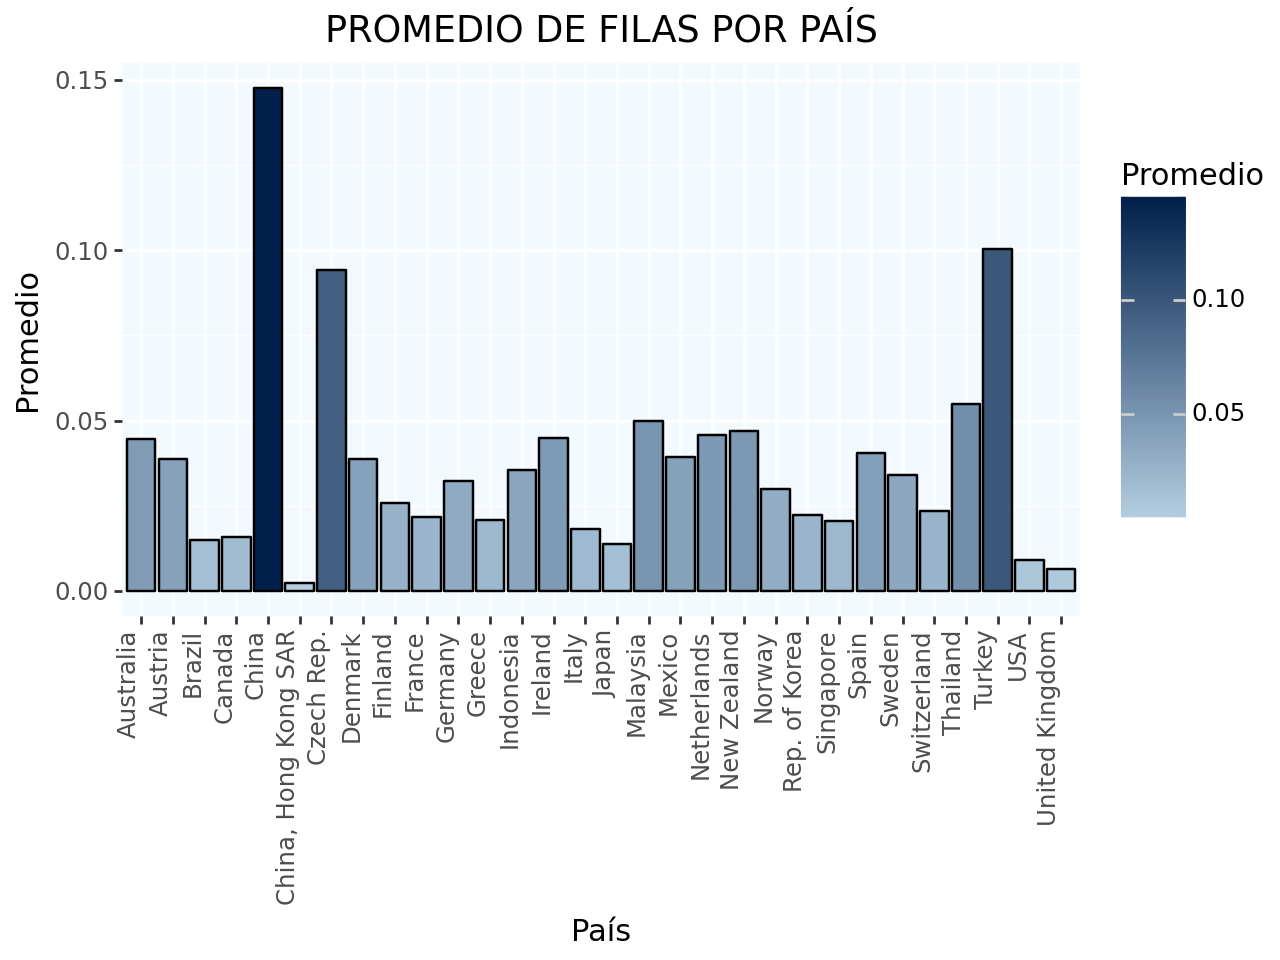

In [34]:
# Crear un DataFrame con los promedios fila y los países
df = pd.DataFrame({'País': yi_.index, 'Promedio': yi_.values})

# Crear el histograma usando ggplot
histograma = (
    ggplot(df, aes(x='País', y='Promedio', fill='Promedio')) +
    geom_bar(stat='identity', color='black') +
    labs(title='PROMEDIO DE FILAS POR PAÍS', x='País', y='Promedio') +
    theme(axis_text_x=element_text(angle=90, hjust=1), panel_background=element_rect(fill='#f2f9ff')) +  # Rotar etiquetas del eje x
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)

# Mostrar el histograma
histograma.show()

_Los promedios fila se pueden interpretar como el número promedio de nuevas exportaciones de bienes manufacturados que ha creado cada país en los diez años._

- **Calcule la media de todas las observaciones de cada columna de *Y*, es decir, calcule la media columna $ \bar{y}_{j} = \frac{1}{n-1} \sum_{i: i \neq j} y_{i,j} $ para cada país. Realice un histograma de los promedios columna $ \bar{y}_{j} $. Los promedios columna caracterizan diferentes niveles de actividad de los nodos en términos de la popularidad. ¿Cómo se pueden interpretar los promedio columna $ \bar{y}_{j} $ en este caso?**





In [35]:
yj_=Y.apply(np.mean, axis=0) # axis 0 para columna y np.mean indica la funcion empleada
yj_.head()

Australia   0.0399
Austria     0.0339
Brazil      0.0124
Canada      0.0482
China       0.1457
dtype: float64

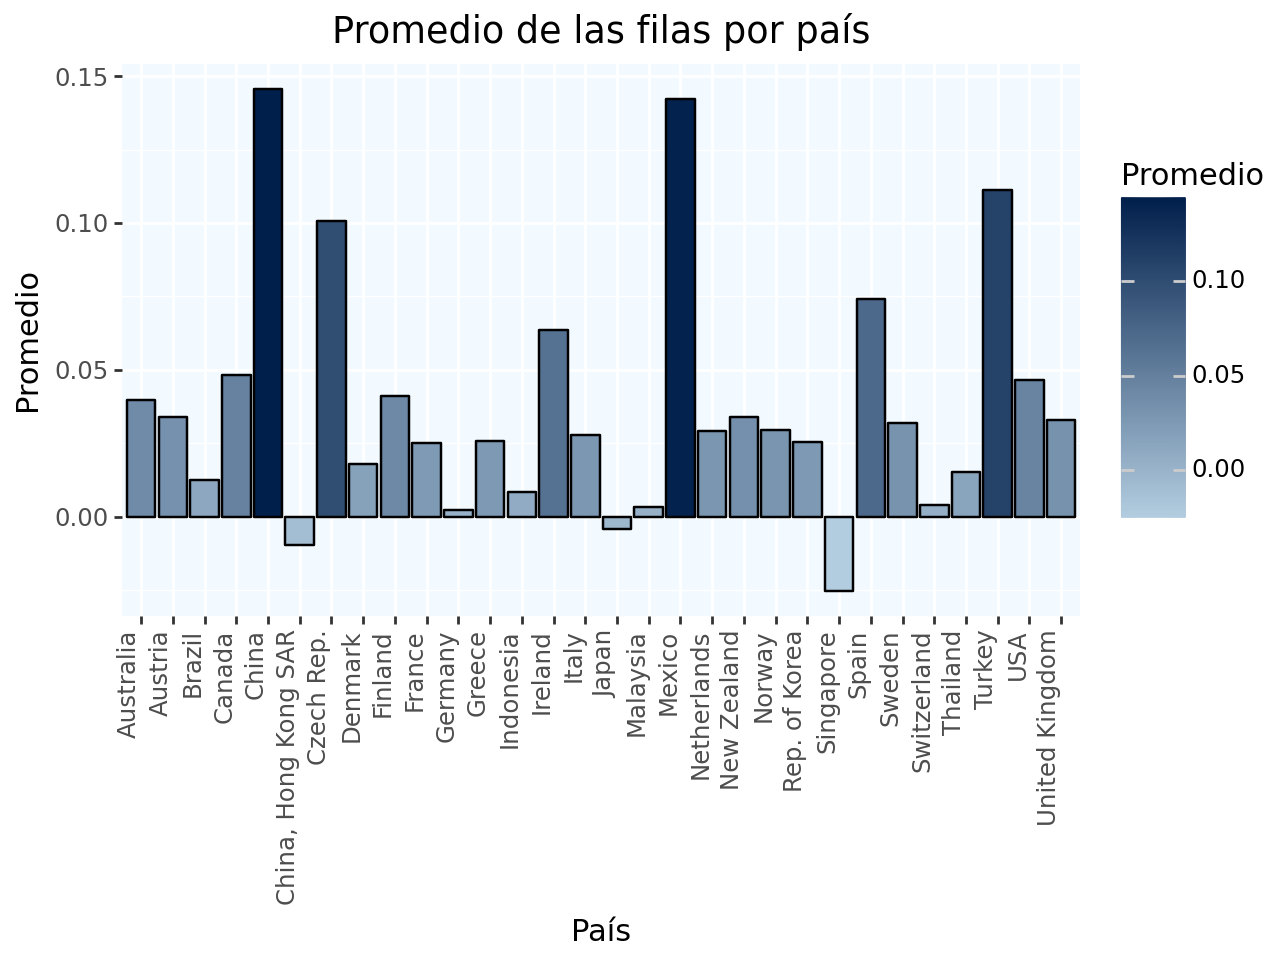

In [36]:
# Crear un DataFrame con los promedios fila y los países
df = pd.DataFrame({'País': yj_.index, 'Promedio': yj_.values})

# Crear el histograma usando ggplot
histograma = (
    ggplot(df, aes(x='País', y='Promedio', fill='Promedio')) +
    geom_bar(stat='identity', color='black') +
    labs(title='Promedio de las filas por país', x='País', y='Promedio') +
    theme(axis_text_x=element_text(angle=90, hjust=1), panel_background=element_rect(fill='#f2f9ff')) +  # Rotar etiquetas del eje x
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)

# Mostrar el histograma
histograma.show()


_Los promedios columnas se pueden interpretar como el número promedio de nuevas importaciones de bienes manufacturados que ha creado cada país en los diez años._

- **Calcule tanto la media de los promedios fila $ \bar{y}_{i \cdot} $ como la media de los promedios columna $ \bar{y}_{\cdot j} $. ¿Qué se puede concluir?**

In [37]:
print('La media de los promedio filas es:' + str(np.mean(yj_)) + '\nLa media de los promedios column es:' + str(np.mean(yi_)))

La media de los promedio filas es:0.03778362250505483
La media de los promedios column es:0.037783622505054834


Se puede observar claramente que al aumentar las exportaciones a nivel mundial, también aumentan las importaciones en la misma cantidad. De la misma manera, cuando las exportaciones aumentan, las importaciones también lo hacen en la misma cantidad.

- **Calcule tanto la DE de los promedios fila $ \bar{y}_{i \cdot} $ como la DE de los promedios columna $ \bar{y}_{\cdot j} $. ¿Qué se puede concluir**


In [38]:
print('La DE de los promedio filas es:' + str(np.std(yj_)) + '\nLa DE de los promedios column es:' + str(np.std(yi_)))

La DE de los promedio filas es:0.04032616020335056
La DE de los promedios column es:0.02969207985239439


Lo que se puede concluir a partir de estos valores es que el número de nuevas exportaciones es más heterogéneo que el ritmo de nuevas importaciones. Esta heterogeneidad se puede interpretar como que hay más diferencia en el número de países a los que se exporta por país en comparación con el número de países que importan a un país.

- **Calcule el coeficiente de correlación entre los promedios fila $ \bar{y}_{i \cdot} $ y los promedios columna $ \bar{y}_{\cdot j} $. Realice un dispersograma de los promedios columna $ \bar{y}_{\cdot j} $ (eje $ y $) frente a los promedios fila $ \bar{y}_{i \cdot} $ (eje $ x $), junto con la recta $ y = x $ como punto de referencia. ¿Qué se puede concluir?**

In [39]:
df = pd.DataFrame({'País': yj_.index, 'Promedio Columna': yj_.values,'Promedio Fila': yi_.values})

In [40]:
print('El coeficiente de correlacións es:'+ str(np.corrcoef(yj_, yi_)[0][1]))

El coeficiente de correlacións es:0.7002525838691275


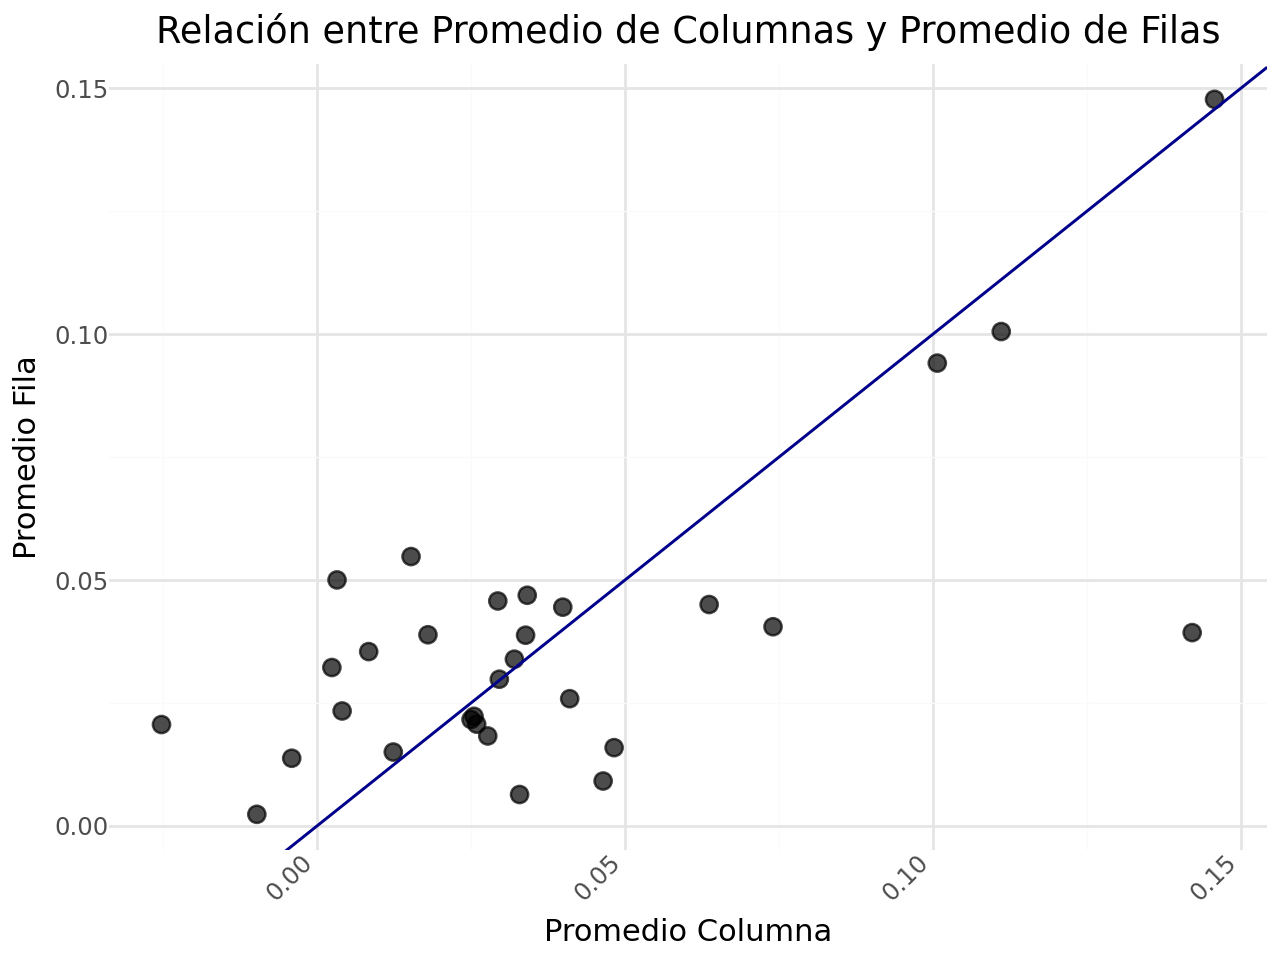

In [41]:
(
    ggplot(df, aes(x="Promedio Columna", y="Promedio Fila", label="País")) +
    geom_point(color="black", size=3, alpha=0.7) +  # Ajustar tamaño y transparencia de los puntos
    geom_abline(intercept=0, slope=1, color="darkblue", size=0.6) +  # Añadir línea de referencia
    labs(title="Relación entre Promedio de Columnas y Promedio de Filas", x="Promedio Columna", y="Promedio Fila") +
    theme_minimal() +  # Tema minimalista
    theme(axis_text_x=element_text(angle=45, hjust=1))  # Rotar etiquetas del eje x
)


Se puede apreciar cierto tipo de relación lineal entre los promedios columna y los promedios fila, lo que indica que cuando un país tiene altas  exportaciones, también tiende a tener alto el número de importaciones.

### <font color='red'>PUNTO 7</font>


Considere el conjunto de datos dado en `conflict.RData` recopilado por Mike Ward y Xun Cao del departamento de Ciencias Políticas de la Universidad de Washington. Estos datos están asociados con datos de conflictos entre países en los años 90. El archivo `conflict.RData` contiene una lista con tres arreglos: `X`, `Y`, y `D`. 

- `X` tiene tres campos: 
  - `population` (población en millones), 
  - `gdp` (PIB en millones de dólares), 
  - `polity` (puntuación política: índice de democracia).
  
- `Y` hace referencia a una matriz Y = [y_i,j] en la que y_i,j representa el número de conflictos iniciados por el país i hacia el país j.

- Finalmente, `D` es un arreglo de tres dimensiones cuya tercera dimensión contiene índices entre cada par de países asociados con: comercio (dimensión 1), importaciones (dimensión 2), organizaciones intergubernamentales (dimensión 3) y distancia geográfica (dimensión 4).

_Se importa el contenido de R a python_

In [42]:
D = np.loadtxt("D.txt")  # Saltamos la primera fila que contiene los nombres de las columnas

In [43]:
Y = pd.read_csv("Y.txt", delimiter="\t")
Y.info()
Y.head()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, AFG to ZIM
Columns: 130 entries, AFG to ZIM
dtypes: int64(130)
memory usage: 133.0+ KB


,AFG,ALB,ALG,ANG,ARG,AUL,AUS,BAH,BEL,BEN,...,TUR,UAE,UGA,UKG,URU,USA,VEN,YEM,ZAM,ZIM
AFG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = pd.read_csv("X.txt", delimiter="\t")
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, AFG to ZIM
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  130 non-null    float64
 1   gdp         130 non-null    float64
 2   polity      130 non-null    float64
dtypes: float64(3)
memory usage: 4.1+ KB


,population,gdp,polity
AFG,24.7800,19.2900,-4.6400
ALB,3.2800,8.9500,3.8200
ALG,27.8900,133.6100,-3.9100
ANG,10.6600,15.3800,-2.5500
ARG,34.7700,352.3800,7.1800


In [45]:
X['population']

AFG    24.7800
ALB     3.2800
ALG    27.8900
ANG    10.6600
ARG    34.7700
        ...   
USA   262.9500
VEN    21.8400
YEM    15.1300
ZAM     8.9600
ZIM    11.1500
Name: population, Length: 130, dtype: float64

- **Elabore una visualización decorada de la red de conflictos teniendo en cuenta diferentes diseños.**

In [46]:
g=ig.Graph.Adjacency(Y, mode= 'directed')  # No se pueden agregar los pesos por medio de esta funcion 
weights=[] # se hace manualmente
for edge in g.es:
   weights.append(Y.iloc[edge.tuple])

g.es['weight'] = weights
g.is_weighted()

True

In [47]:
# Asignar variables nodales
g.vs['population'] = X['population'].tolist()
g.vs['gdp'] = X['gdp'].tolist()
g.vs['polity'] = X['polity'].tolist()

In [48]:
# Establecer la semilla para la generación de números aleatorios
np.random.seed(123)

# Generar un diseño circular para el grafo con semilla 123
#layout = g.layout_davidson_harel()
#layout = g.layout_fruchterman_reingold()
#layout = g.layout_reingold_tilford
layout = g.layout_lgl()

C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\igraph\layout.py:691: RuntimeWarning: LGL layout does not support disconnected graphs yet. at src/layout/large_graph.c:174


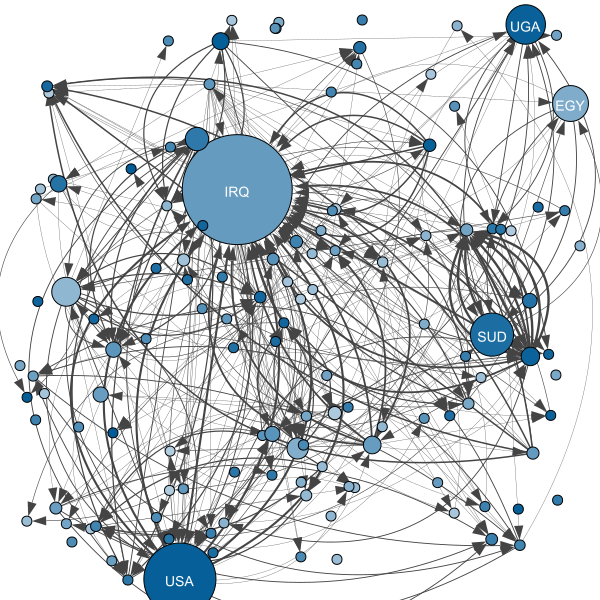

In [49]:
import matplotlib.colors as mcolors

# Rango de colores de azul a negro con transparencia
azul = mcolors.hex2color('#b3cde0') + (0.5,)
negro = mcolors.hex2color('#005b96') + (0.5,)
colors = [mcolors.to_hex((azul[0] + (negro[0] - azul[0]) * (i / (len(g.vs) - 1)),
                          (azul[1] + (negro[1] - azul[1]) * (i / (len(g.vs) - 1))),
                          (azul[2] + (negro[2] - azul[2]) * (i / (len(g.vs) - 1))),
                          (azul[3] + (negro[3] - azul[3]) * (i / (len(g.vs) - 1))))) for i in range(len(g.vs))]

# Calcular la centralidad de los nodos
centralidad = g.betweenness()

# Normalizar la centralidad para el tamaño de los nodos
max_centralidad = max(centralidad)
sizes = [10 + 100 * c / max_centralidad for c in centralidad]

# Obtener los índices de los 10 nodos más importantes
top_10_indices = sorted(range(len(centralidad)), key=lambda i: centralidad[i], reverse=True)[:5]

# Obtener los nombres de los 10 nodos más importantes
top_10_nombres = [g.vs[i]['name'] for i in top_10_indices]

# Preparar una lista de etiquetas de nodo para mantener solo los nombres de los 10 nodos más importantes
etiquetas_nodos = [nombre if nombre in top_10_nombres else '' for nombre in g.vs['name']]

# Graficar el grafo con solo los nombres de los 10 nodos más importantes
ig.plot(g, layout=layout, edge_width=[weight * 0.3 for weight in weights], vertex_color=colors, vertex_size=sizes, vertex_label=etiquetas_nodos,  vertex_label_color = "white")

- **Calcule e interprete la media global.**

In [50]:
print('La media global es: '+str(round(sum(Y.stack())/(Y.shape[1]*(Y.shape[1]-1)),4)))

# vectorizamos Y, Y luego sacamos el respectivo n con Y.shape

La media global es: 0.0182


La posibilidad de que haya una nueva guerra entre dos paises culesquiera es de aproximadamente el 2%.

- **Obtenga y grafique la distribución del _out-degre_ y del _in-degee. Calule e interprete la media y la desviación estándar de esta distribución._**

In [51]:
# Obtener los grados de salida y entrada de cada nodo
out_degree = g.degree(mode='out')
in_degree = g.degree(mode='in')

# Crear DataFrames separados para los grados de salida y entrada
out_degree = pd.DataFrame(out_degree, columns=['Out-Degree'])
in_degree = pd.DataFrame(in_degree, columns=['In-Degree'])

# Concatenar los DataFrames en uno solo
degree = pd.concat([out_degree, in_degree], axis=1)

#Cambiar el nombre de las filas
degree.index=Y.index.tolist()

In [52]:
 degree[degree['In-Degree'] == 40]

,Out-Degree,In-Degree
IRQ,30,40


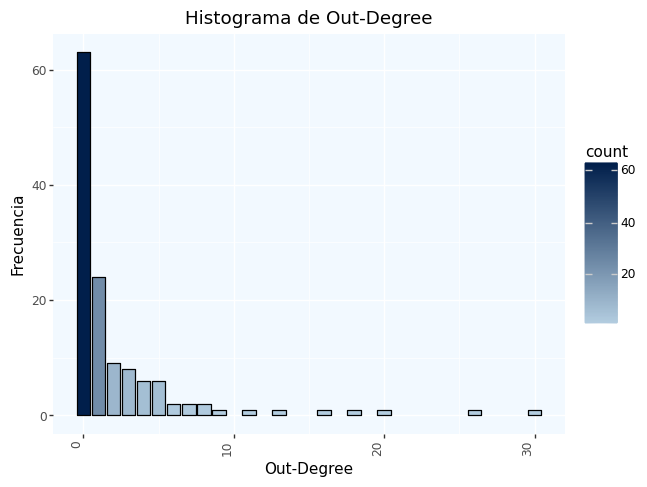

In [53]:
# Crear el histograma usando ggplot
histograma = (
    ggplot(degree, aes(x='Out-Degree', fill='..count..')) +  # Utilizamos ..count.. para hacer referencia al conteo de observaciones en el histograma
    geom_bar(color='black') +
    labs(title='Histograma de Out-Degree', x='Out-Degree', y='Frecuencia') +
    theme(axis_text_x=element_text(angle=90, hjust=1),  # Rotar etiquetas del eje x
          panel_background=element_rect(fill='#f2f9ff')) +  # Color de fondo del panel
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)

# Mostrar el histograma
histograma.draw()

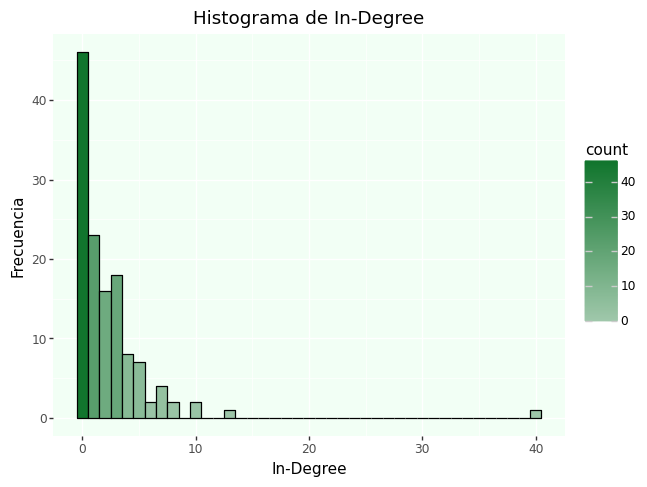

In [54]:
# Crear el histograma usando ggplot
histograma = (
    ggplot(degree, aes(x='In-Degree', fill='..count..')) +
    geom_histogram(binwidth=1, color='black') +
    labs(title='Histograma de In-Degree', x='In-Degree', y='Frecuencia') +
    theme(panel_background=element_rect(fill='#f2fff5')) +  # Color de fondo del panel
    scale_fill_gradient(low="#a0c8ab", high="#11752d")  # Escala de colores
)

# Mostrar el histograma
histograma.draw()

In [55]:
print('media y desviación estándar del Out-Degree: ' + str (np.mean(g.degree(mode='out'))) + ' , '+ str(np.std(g.degree(mode='out')))) 
print('media y desviación estándar del In-Degree: ' + str (np.mean(g.degree(mode='in'))) + ' , '+ str(np.std(g.degree(mode='in'))))

media y desviación estándar del Out-Degree: 2.3461538461538463 , 4.712849111266149
media y desviación estándar del In-Degree: 2.3461538461538463 , 4.115097042432785


Es claro que la media de países que inician un conflicto con otro es igual a la media de países en los que algún país se ve involucrado en un conflicto sin iniciarlo primero. La desviación estándar de ambas distribuciones nos da a entender que el número de conflictos en los que se involucran los países, ya sea iniciándolos o no, es bastante diferente entre ellos.

- **Calcule el coeficiente de correlación entre los valores del out-degree y el in-degree. Realice un dispersograma de los grados de entrada (eje y) frente a los grados de salida (eje x), junto con la recta y = x como punto de referencia. puede concluir?**

In [56]:
print('El coeficiente de correlacións es:'+ str(np.corrcoef(degree['Out-Degree'],degree['In-Degree'])[0][1]))

El coeficiente de correlacións es:0.6831764174891657


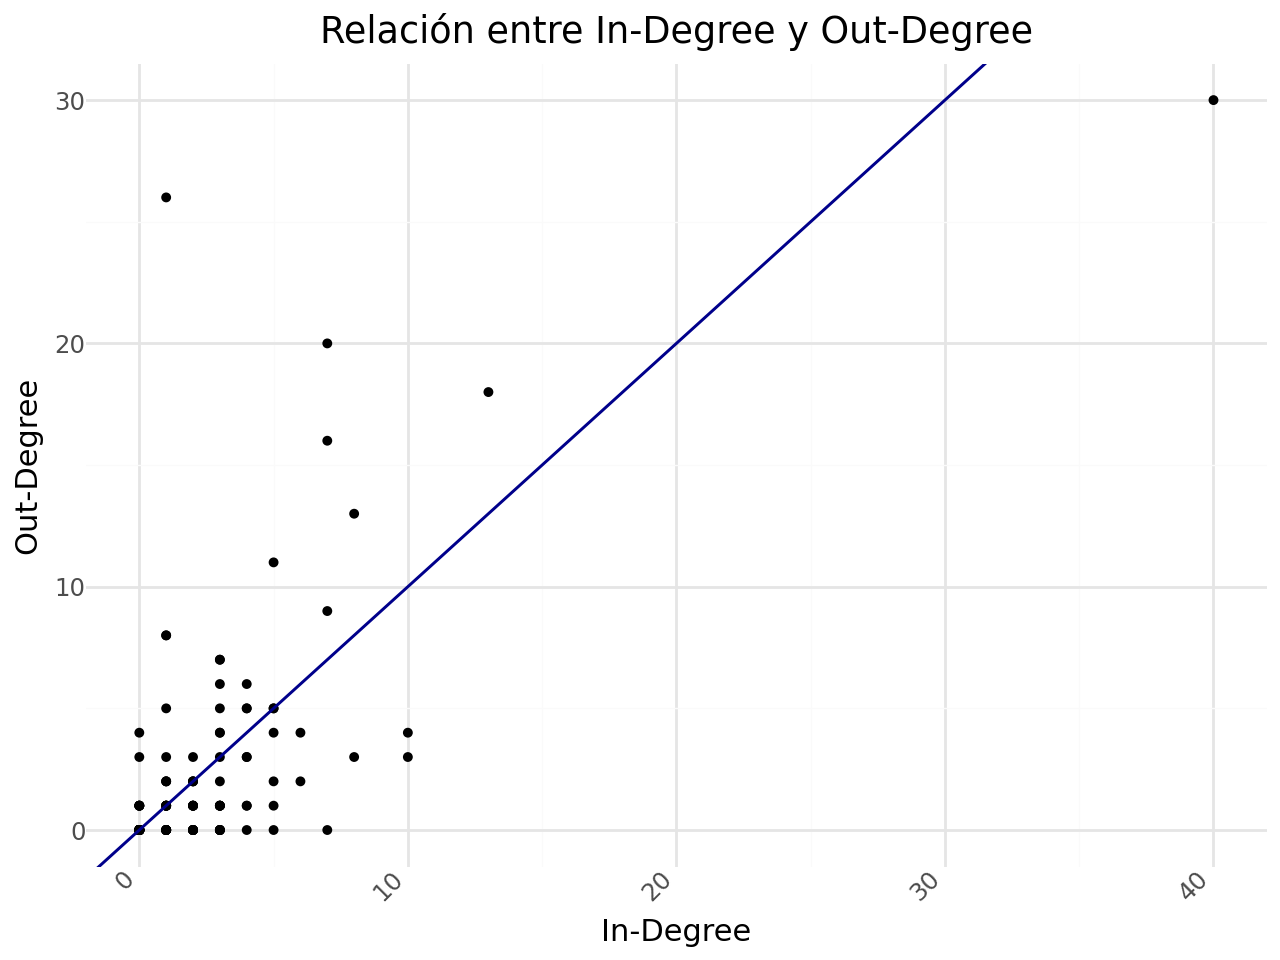

In [57]:
(
    ggplot(degree, aes(x="In-Degree", y="Out-Degree")) +
    geom_point(color="black", shape="o", size=1) +
    geom_abline(intercept=0, slope=1, color="darkblue", size=0.6) +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    labs(title="Relación entre In-Degree y Out-Degree", x="In-Degree", y="Out-Degree")
)

A medida que un país inicia más conflictos con otros países, es probable que otros países inicien más conflictos con este país en respuesta.

- **Identifique los países mas activos de acuerdo con el grado.**

In [58]:
degree.sort_values(by=["Out-Degree"],ascending=[False]).head()

,Out-Degree,In-Degree
IRQ,30,40
JOR,26,1
TUR,20,7
USA,18,13
PRK,16,7


In [59]:
degree.sort_values(by=["In-Degree"],ascending=[False]).head()

,Out-Degree,In-Degree
IRQ,30,40
USA,18,13
GRC,4,10
JPN,3,10
CHN,13,8


### <font color='red'>PUNTO 8</font>
 
Considere los datos relacionales acerca de los conflictos internacionales del archivo `conflict.RData` habiendo removido los nodos aislados:

```R
# datos
load("conflict.RData")
Y <- dat$Y

# remover nodos aislados
Y <- 1 * (Y * t(Y) > 0)

deg <- apply(X = Y, MARGIN = 1, FUN = sum, na.rm = TRUE)
Y <- Y[deg > 0, deg > 0]


In [60]:
Y = pd.read_csv("Y.txt", delimiter="\t")
Y.info()
Y.head()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, AFG to ZIM
Columns: 130 entries, AFG to ZIM
dtypes: int64(130)
memory usage: 133.0+ KB


,AFG,ALB,ALG,ANG,ARG,AUL,AUS,BAH,BEL,BEN,...,TUR,UAE,UGA,UKG,URU,USA,VEN,YEM,ZAM,ZIM
AFG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
Y = 1 * (Y * Y.T > 0)
deg=(Y.apply(np.sum, axis=0))
# Obtener los índices de las columnas con grado mayor que cero
Y=Y.loc[:, deg > 0][deg > 0]

In [62]:
Y.info()
Y.head()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, AFG to USA
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AFG     48 non-null     int32
 1   ANG     48 non-null     int32
 2   BAH     48 non-null     int32
 3   BNG     48 non-null     int32
 4   BUI     48 non-null     int32
 5   CAN     48 non-null     int32
 6   CHN     48 non-null     int32
 7   COS     48 non-null     int32
 8   CUB     48 non-null     int32
 9   CYP     48 non-null     int32
 10  DRC     48 non-null     int32
 11  EGY     48 non-null     int32
 12  FRN     48 non-null     int32
 13  GHA     48 non-null     int32
 14  GRC     48 non-null     int32
 15  GUI     48 non-null     int32
 16  HON     48 non-null     int32
 17  IND     48 non-null     int32
 18  IRN     48 non-null     int32
 19  IRQ     48 non-null     int32
 20  ISR     48 non-null     int32
 21  ITA     48 non-null     int32
 22  JPN     48 non-null     int32
 23  LBR     48 non-null

,AFG,ANG,BAH,BNG,BUI,CAN,CHN,COS,CUB,CYP,...,SYR,TAW,TAZ,THI,TOG,TUR,UAE,UGA,UKG,USA
AFG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BNG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUI,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
g=ig.Graph.Adjacency(Y, mode= 'undirected')  # No se pueden agregar los pesos por medio de esta funcion 
weights=[] # se hace manualmente
for edge in g.es:
   weights.append(Y.iloc[edge.tuple])

g.es['weight'] = weights
g.is_weighted()

True

- **Elabore una visualización decorada de la red teniendo en cuenta diferentes diseños**

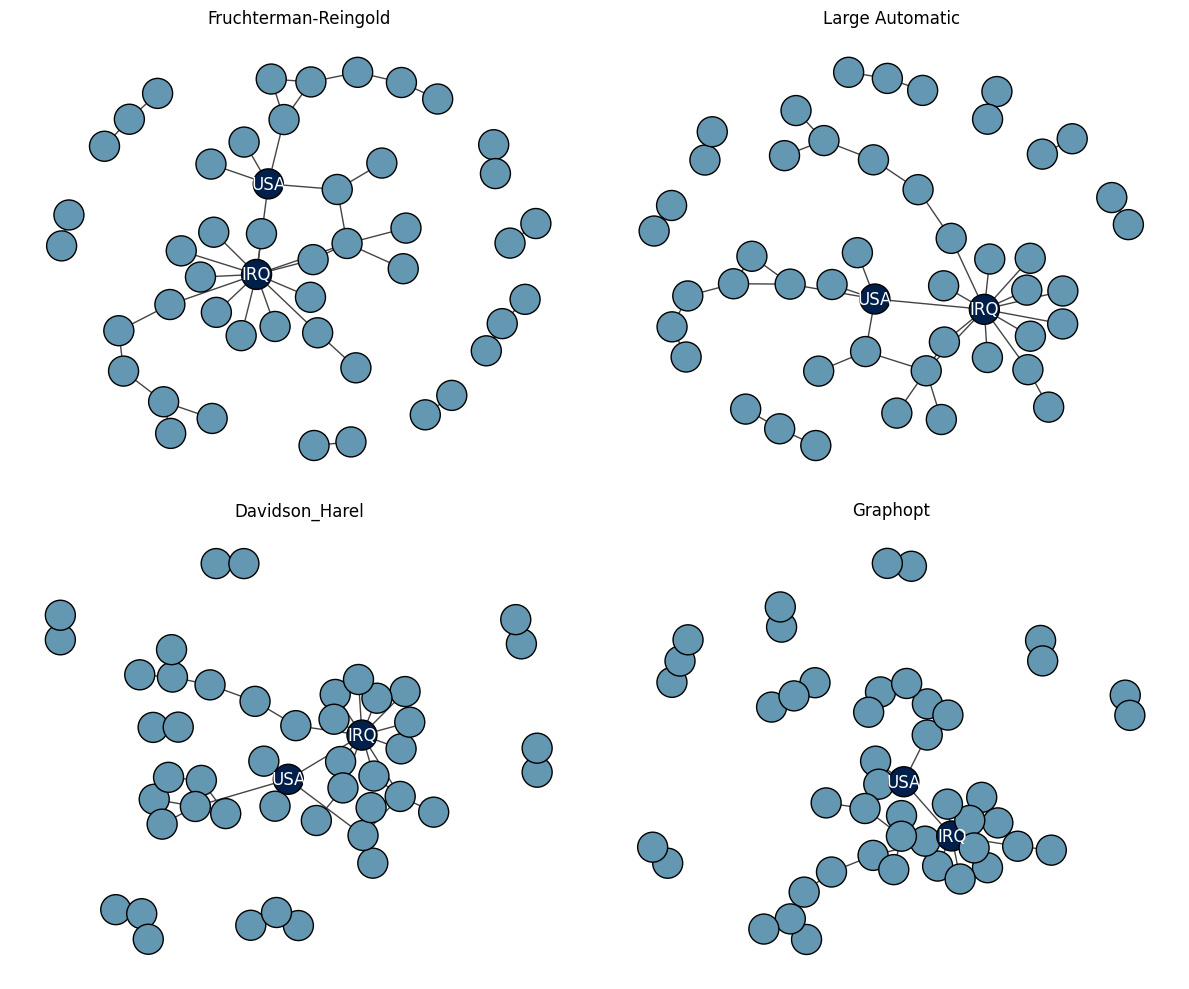

In [64]:
from igraph import plot
import matplotlib.pyplot as plt

# Suponiendo que tienes un objeto 'g' que representa tu gráfico

# Diseños de la red
layouts = [g.layout_fruchterman_reingold(), g.layout_auto(), g.layout_davidson_harel(), g.layout_graphopt()]

# Títulos de los layouts
titles = ["Fruchterman-Reingold", "Large Automatic", "Davidson_Harel", "Graphopt"]

# Crear la figura de matplotlib para los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Crear las visualizaciones de la red para cada diseño y colocarlas en los subgráficos
for i, (layout, title) in enumerate(zip(layouts, titles)):
    ax = axs[i // 2, i % 2]
    if "weight" in g.es.attribute_names():
        edge_width = [w for w in g.es["weight"]]
    else:
        edge_width = [1] * len(g.es)
    
    # Color de los nodos
    colors = ['#011f4b' if node == 'IRQ' or node == 'USA' else '#6497b1' for node in g.vs["name"]]
    
    # Etiquetas de los nodos
    labels = ['' if node not in ['IRQ', 'USA'] else node for node in g.vs["name"]]
    
    plot(g, layout=layout, target=ax, edge_width=edge_width, vertex_color=colors, vertex_label=labels, vertex_label_color='white')
    ax.set_title(title)

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


- **Identifique las componentes conectadas del grafo.**

In [65]:
Componentes=g.connected_components() 
Comp=[]
for i in Componentes:
    print(Y.columns[i])

Index(['AFG', 'ANG', 'BAH', 'CAN', 'CHN', 'CUB', 'CYP', 'DRC', 'EGY', 'FRN',
       'GRC', 'IRN', 'IRQ', 'ISR', 'ITA', 'JPN', 'NTH', 'OMA', 'PHI', 'PRK',
       'QAT', 'ROK', 'RWA', 'SAU', 'SUD', 'SYR', 'TAW', 'TUR', 'UAE', 'UGA',
       'UKG', 'USA'],
      dtype='object')
Index(['BNG', 'IND', 'PAK'], dtype='object')
Index(['BUI', 'TAZ'], dtype='object')
Index(['COS', 'HON', 'NIC'], dtype='object')
Index(['GHA', 'TOG'], dtype='object')
Index(['GUI', 'LBR'], dtype='object')
Index(['LES', 'SAF'], dtype='object')
Index(['MYA', 'THI'], dtype='object')


- **Identifique la componente gigante del grafo.**

In [66]:
G=g.subgraph(Componentes[0])

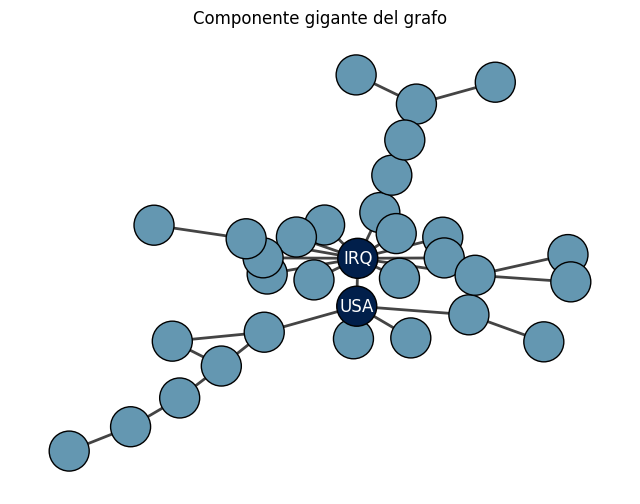

In [67]:
from igraph import plot
import matplotlib.pyplot as plt

# Color de los nodos
colors = ['#011f4b' if node == 'IRQ' or node == 'USA' else '#6497b1' for node in G.vs["name"]]

# Etiquetas de los nodos
labels = ['' if node not in ['IRQ', 'USA'] else node for node in G.vs["name"]]

# Crear la figura de matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Visualizar el subgrafo
plot(G, target=ax, vertex_size = 40 , vertex_color=colors, vertex_label=labels, vertex_label_color='white')

# Ajustar el título
plt.title("Componente gigante del grafo")

# Mostrar la figura
plt.show()

- **Calcule la matriz de distancias geodésicas de la componente gigante del grafo e incrustar estas distancias en un espacio de dos dimensiones por medio de escalamiento multidimensional ( cmdscale en R).**

In [68]:
from igraph import Graph
from sklearn.manifold import MDS
import numpy as np

# Suponiendo que tienes una variable 'G' que contiene tu grafo

# Obtener la componente gigante del grafo
G_gigante = G.subgraph(max(G.components(), key=len))

# Calcular la matriz de distancias geodésicas
distancias = np.array(G_gigante.shortest_paths_dijkstra())

# Aplicar escalamiento multidimensional (MDS) para reducir a 2 dimensiones
mds = MDS(n_components=2, dissimilarity='precomputed')
coordenadas = mds.fit_transform(distancias)

# Visualizar los puntos en el espacio de 2 dimensiones
print(coordenadas)

[[ 3.27667899 -0.86901834]
 [-4.70544662  3.21958225]
 [-0.66188819  0.21699688]
 [ 1.0283641  -1.48556853]
 [-0.22562726 -5.21510745]
 [ 1.49598605 -1.41833698]
 [ 2.60566767  1.50438032]
 [-3.62169328  2.98139805]
 [-1.02754735  1.05724598]
 [ 0.41252478  0.97450942]
 [ 1.32890469  0.77822835]
 [ 2.05006392 -0.67592908]
 [ 0.21268889  0.32921237]
 [-0.12302144  0.15443929]
 [ 0.0083732   1.17601609]
 [-0.17537691 -3.08277275]
 [ 0.61937556  0.52005837]
 [-0.79588665 -0.09988899]
 [-0.37660405 -6.2366733 ]
 [ 0.10087457 -1.99781933]
 [ 1.41817715  2.79864536]
 [ 0.28538349 -3.00175315]
 [-4.02034858  4.0918705 ]
 [ 0.60463721  1.67280529]
 [-1.9733553   1.65183248]
 [ 2.77100522  1.11185077]
 [-0.25054827 -4.1636564 ]
 [ 1.60367406  0.64828553]
 [ 0.77064055  1.28988941]
 [-2.82696966  2.29256567]
 [-0.29207887  0.63655626]
 [ 0.48337234 -0.85984437]]


C:\Users\Pc\AppData\Local\Temp\ipykernel_5304\1328426496.py:11: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead


### <font color='red'>PUNTO 9</font>

Consiga una base de datos relacionales de su interés de cualquier área de estudio.



- **¿De qué se trata la red? ¿A qué corresponden los vértices? ¿Las aristas?**

La red se ha obtenido del siguiente enlace: [Anime Recommendation Database 2020](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020?select=animelist.csv).

Se trata de una base de datos que contiene información sobre animes emitidos desde la década de los 90 hasta el año 2021, así como una base de datos de usuarios en la que se registra qué animes han visto y su respectiva calificación. Además de esta información, la base de datos también incluye el género del anime y el número de episodios.

Con estas dos bases de datos, se puede construir una red bipartita, donde los nodos de un tipo representan a los usuarios y los nodos del otro tipo representan a los animes. Las conexiones entre ellos representan las calificaciones de los usuarios a los animes.

Los usuarios suman más de 300,000, mientras que los animes son alrededor de 17,000. Para realizar el análisis, se utilizará la matriz $Y^T Y$, limitándose únicamente a los animes emitidos entre 2020 y el primer semestre del 2021 que tenga mas de 9 episodios.

Por lo tanto, los vértices serán las series y las aristas representarán el número de usuarios que ven ambas series al mismo tiempo.


- **¿Por qué es interesante estudiar esta red? ¿Qué preguntas se quieren respon
der**?

Es interesante estudiar esta red si se presenta interés por alguna de estas series y se quiere ver cómo se relaciona con otras.

La pregunta que surge de esta red es: 

¿cómo se relacionan las series en esta red bipartita?

¿Se pueden generar grupos homogéneos dentro y heterogéneos entre ellos para poder hacer recomendaciones basadas en esto? ¿Las ponderaciones dificultarán el momento de la clasificación?

¿Se pueden utilizar más características para mejorar el agrupamiento, como el análisis de las descripciones de las series para poder recomendar alguna de ellas? ¿Influirán las variables nodales en el momento de hacer el agrupamiento?

¿Se podrá implementar algún tipo de muestreo para hacer el agrupamiento más fácil y poder extenderlo a toda la red?


- **Elabore una visualización tanto simple como decorada de la red.**

## Tratamiento de datos 

In [69]:
usuarios=pd.read_csv('animelist.csv',
                     na_values=["Unknown"],
                     header=0,
                     usecols=[0,1,2,3],
                     names=["user_id","anime_id","rating" ,"watching_status"],
                     dtype={"user_id":str,"anime_id":str,"rating":np.float64,"watching_status":np.float64})

In [70]:
anime=pd.read_csv('anime.csv', dtype={'id':str})

In [71]:
anime['Aired'] = anime['Aired'].fillna('').astype(str)# como hay NAS entonces el cuaderno de jupyter no lo lee

In [72]:
anime = anime.query("Episodes > 9 & Aired.str.contains('202')").sort_values(by=["id"], ascending=True).reset_index(drop=True)

In [73]:
id=anime['id'].unique()


In [74]:
anime['Aired'].unique()

array(['Winter 2021', 'Winter 2020', 'Summer 2020', 'Fall 2020',
       'Spring 2020', 'Spring 2021'], dtype=object)

In [75]:
usuarios=(usuarios
 .query('anime_id in @id and watching_status==2')
.sort_values(by=["user_id", "anime_id"], ascending=[True, True]).reset_index(drop=True))

In [76]:
usuarios=usuarios.drop(['watching_status'], axis=1)

In [77]:
df=usuarios.groupby('user_id')['anime_id'].agg(list).reset_index() # se crea un df conformada por el usuario y las series que ha visto

In [78]:
Matriz= pd.DataFrame(0, index=anime['id'].unique(), columns=anime['id'].unique()) # Matriz de series Y'Y

In [79]:
import numpy as np

# Crear una matriz vacía para almacenar los resultados
matriz = pd.DataFrame(index=id, columns=id, dtype=int)

# Convertir 'anime_id' a conjunto para cada fila
df['anime_id'] = df['anime_id'].apply(set)

# Inicializar el contador para cada par de series
contador = np.zeros((len(id), len(id)), dtype=int)

# Iterar sobre las filas del DataFrame
for idx, anime_ids in enumerate(df['anime_id']):
    for i in range(len(id)):
        if id[i] in anime_ids:
            for j in range(i+1, len(id)):
                if id[j] in anime_ids:
                    contador[i, j] += 1
                    contador[j, i] += 1

# Asignar el contador a la matriz
matriz.values[:] = contador


In [80]:
g=ig.Graph.Adjacency(matriz, mode= 'undirected')  # No se p

In [81]:
weights=[] # se hace manualmente
max=matriz.max().max()
for edge in g.es:
   weights.append(matriz.iloc[edge.tuple]) # edge.tuple nos da las parejas de los vertices 
# vamos volver los pesos entre cero y uno
g.es['weight'] = weights
g.is_weighted()

True

In [82]:
Score=anime['Score']

In [83]:
# Supongamos que 'score' es una lista de valores para los nodos

# Crear una secuencia completa de scores
uni_all = np.arange(0,10)

# Generar la paleta de colores
colors = ig.GradientPalette("#b3cde0", "#011f4b", len(uni_all))

# Asignar colores a los nodos basados en sus scores
color_indices = [colors.get(value) for value in Score]
g.vs["color"] = color_indices

g.es["color"] = 'light gray' # escogemos el segundo valor

visual_style = {}
visual_style["vertex_size"] = 6
visual_style["vertex_size"] = 6
# Graficar el grafo con los colores asignados a los vértices
grafico=ig.plot(g, vertex_color=g.vs["color"],**visual_style, seed=123)
grafico.save("grafico.png")
# adaptado de 
# https://stackoverflow.com/questions/66440964/is-there-an-easy-way-to-color-network-nodes-by-degree-in-igraph-for-r

In [84]:
# Configurar los parámetros del gráfico
visual_style = {}
visual_style["vertex_size"] = 4
visual_style["vertex_size"] = 4
visual_style["vertex_label"] = None
visual_style["vertex_color"] = "black"
visual_style["vertex_frame_color"] = "black"
g.es["color"] = 'light gray'
# Graficar el grafo
grafico2=ig.plot(g, **visual_style,seed=123)
grafico2.save("grafico2.png")

In [85]:
from IPython.display import Image

## Imagen de la red decorada con un gradiente de colores que refleja su calificación entre los usuarios que la ven.

Entre mas oscuro el color mayor clasificación.

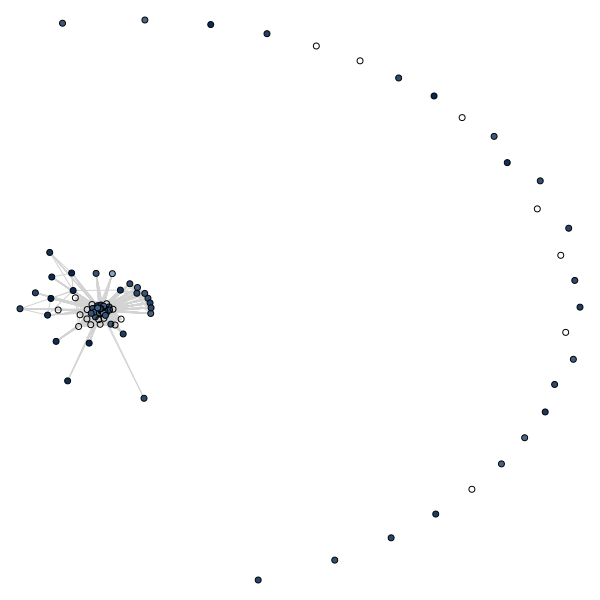

In [86]:
Image(filename="grafico.png")

##  Versión no decorada de la red  

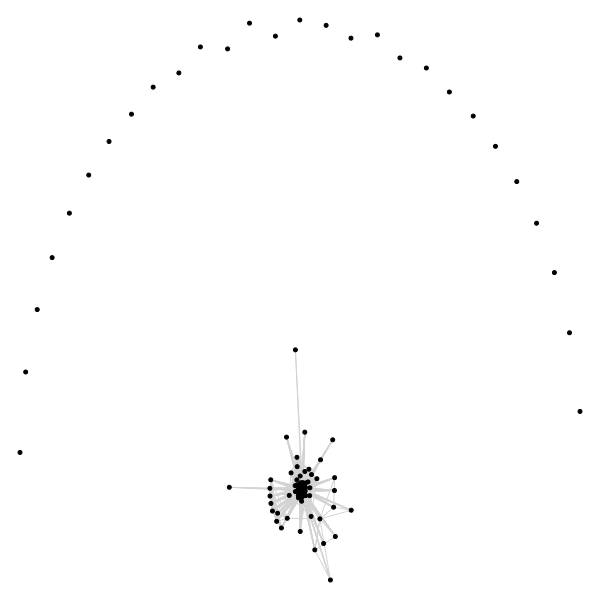

In [87]:
Image(filename="grafico2.png")